In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
boston = load_boston()

In [19]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


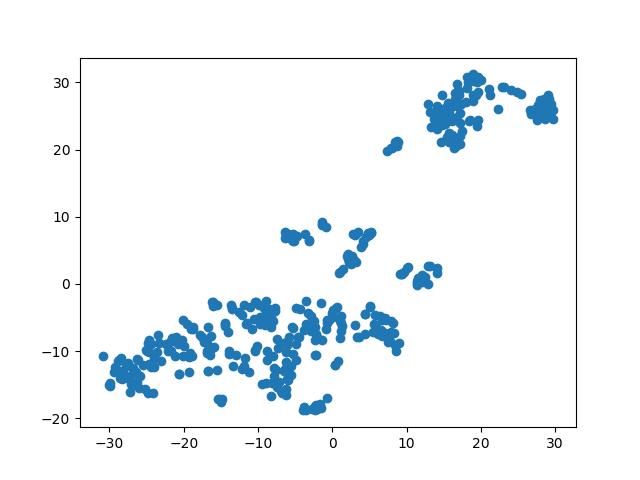

In [26]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [27]:
from sklearn.cluster import KMeans

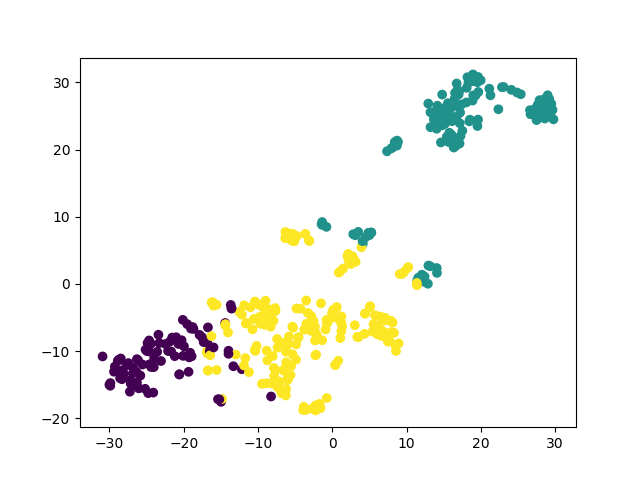

In [32]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [33]:
y_train.mean()

22.796534653465343

In [34]:
y_train[labels_train == 0].mean()

27.78837209302326

In [35]:
y_train[labels_train == 1].mean()

16.165354330708663

In [36]:
y_train[labels_train == 2].mean()

24.958115183246072

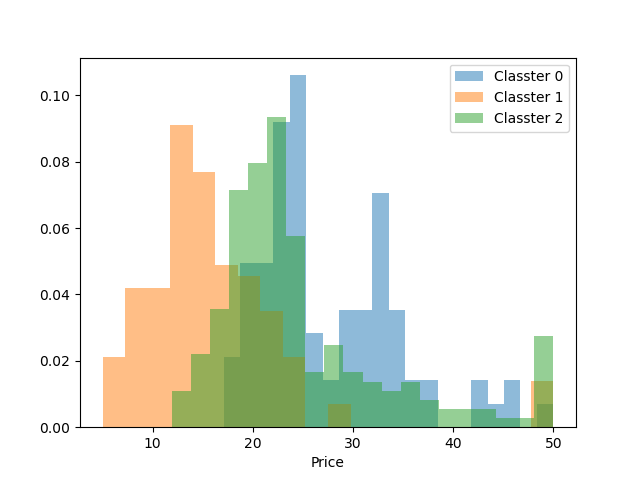

In [37]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Classter 0', 'Classter 1', 'Classter 2'])
plt.xlabel('Price')

plt.show()

In [39]:
print('Classter 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Classter 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Classter 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Classter 0: 0.07356558139534884
Classter 1: 10.797028425196851
Classter 2: 0.4216602094240837


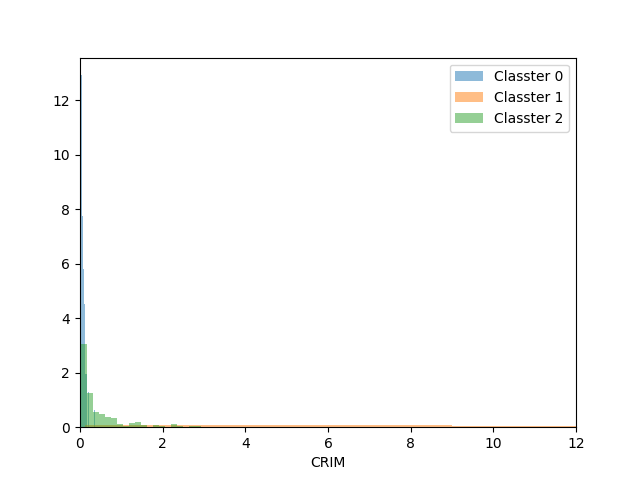

In [40]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Classter 0', 'Classter 1', 'Classter 2'])
plt.xlabel('CRIM')

plt.show()